<a href="https://colab.research.google.com/github/MikeKertesz/Projects/blob/main/Superstore_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First import the csv file and the liberies that will be used.

In [3]:
from google.colab import files
import pandas as pd

# Upload file manually
uploaded = files.upload()

# Read the CSV (replace with your filename)
df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")
df.head()

Saving Sample - Superstore.csv to Sample - Superstore (2).csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
# Find duplicate rows
duplicates = df[df.duplicated()]

# Show how many duplicates
print("Number of duplicate rows:", duplicates.shape[0])


Number of duplicate rows: 0


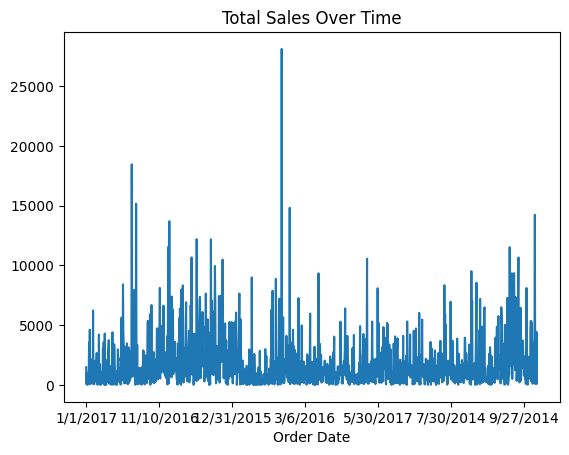

In [10]:
import matplotlib.pyplot as plt
df.groupby('Order Date')['Sales'].sum().plot(kind='line')
plt.title('Total Sales Over Time')
plt.show()

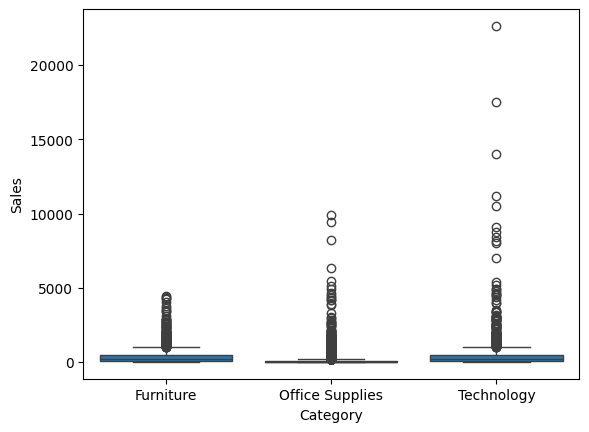

In [12]:
import seaborn as sns
sns.boxplot(x='Category', y='Sales', data=df)
plt.show()

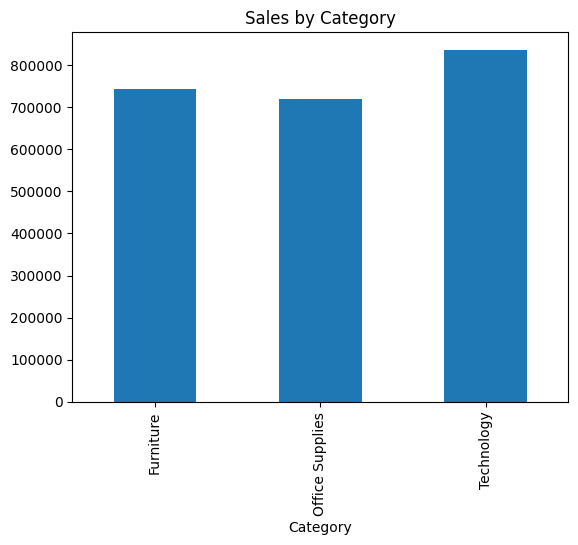

In [13]:
df.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title('Sales by Category')
plt.show()

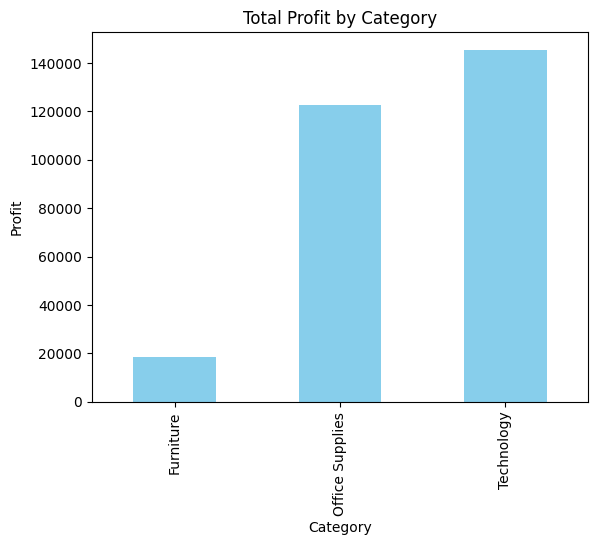

In [19]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values()

# Bar plot
category_profit.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Category')
plt.ylabel('Profit')
plt.show()

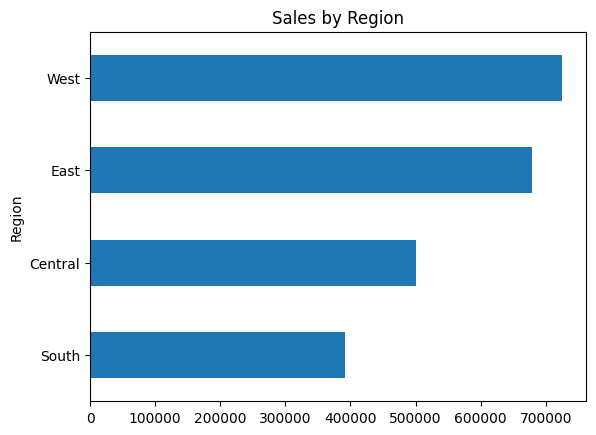

In [14]:
df.groupby('Region')['Sales'].sum().sort_values().plot(kind='barh')
plt.title('Sales by Region')
plt.show()

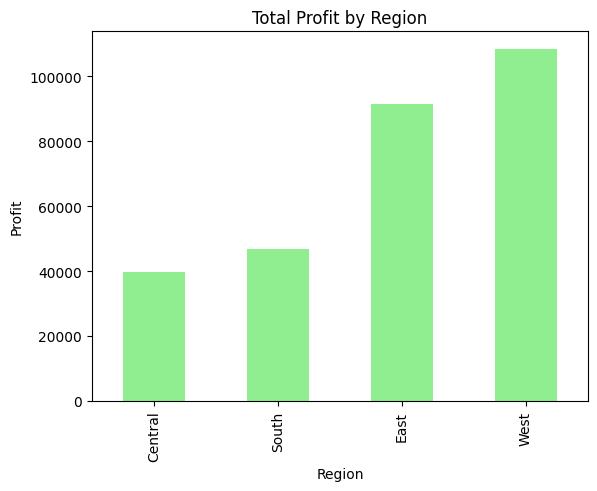

In [20]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values()

region_profit.plot(kind='bar', color='lightgreen')
plt.title('Total Profit by Region')
plt.ylabel('Profit')
plt.show()

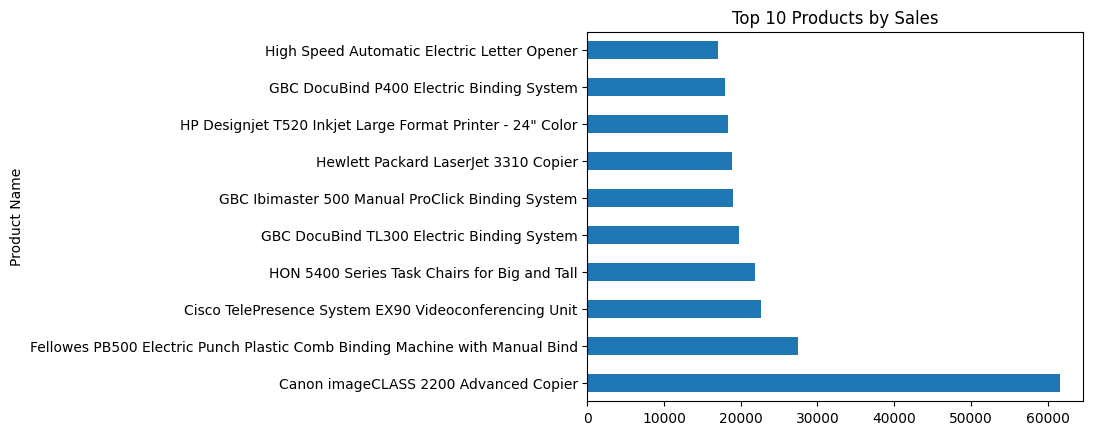

In [16]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh')
plt.title('Top 10 Products by Sales')
plt.show()

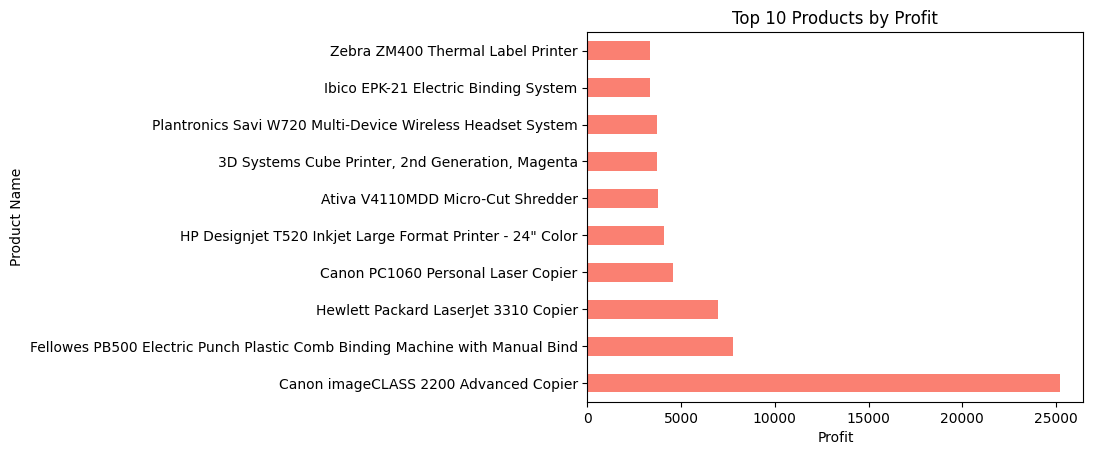

In [21]:
top_products_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

top_products_profit.plot(kind='barh', color='salmon')
plt.title('Top 10 Products by Profit')
plt.xlabel('Profit')
plt.show()

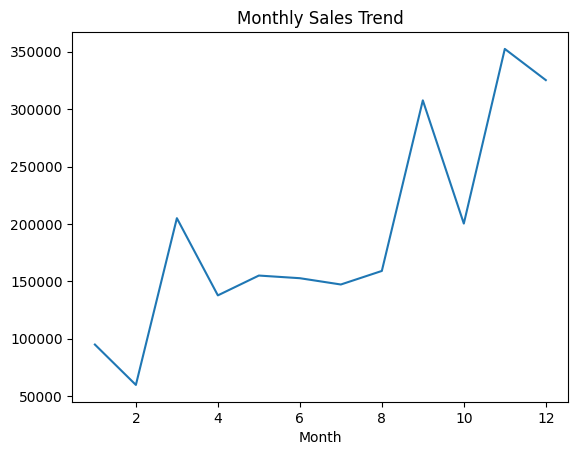

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Now you can access .dt
df['Month'] = df['Order Date'].dt.month

# Example: plot monthly sales
df.groupby('Month')['Sales'].sum().plot(kind='line')
import matplotlib.pyplot as plt
plt.title('Monthly Sales Trend')
plt.show()

In [28]:
customer_agg = df.groupby('Customer Name').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})

# Calculate average profit margin per customer
customer_agg['Profit Margin'] = customer_agg['Profit'] / customer_agg['Sales']

# Sort by Sales descending
customer_agg = customer_agg.sort_values('Sales', ascending=False)

# Calculate cumulative sales percentage
customer_agg['Cumulative %'] = 100 * customer_agg['Sales'].cumsum() / customer_agg['Sales'].sum()

# Assign ABC category
def abc_category(pct):
    if pct <= 70:
        return 'A'
    elif pct <= 90:
        return 'B'
    else:
        return 'C'

customer_agg['ABC Category'] = customer_agg['Cumulative %'].apply(abc_category)

# Show the table
customer_agg.head(20)

,Sales,Profit,Profit Margin,Cumulative %,ABC Category
Customer Name,,,,,
Sean Miller,25043.050,-1980.7393,-0.079093,1.090155,A
Tamara Chand,19052.218,8981.3239,0.471406,1.919522,A
Raymond Buch,15117.339,6976.0959,0.461463,2.577598,A
Tom Ashbrook,14595.620,4703.7883,0.322274,3.212964,A
Adrian Barton,14473.571,5444.8055,0.376190,3.843016,A
Ken Lonsdale,14175.229,806.8550,0.056920,4.460081,A
Sanjit Chand,14142.334,5757.4119,0.407105,5.075715,A
Hunter Lopez,12873.298,5622.4292,0.436751,5.636105,A
Sanjit Engle,12209.438,2650.6769,0.217101,6.167597,A


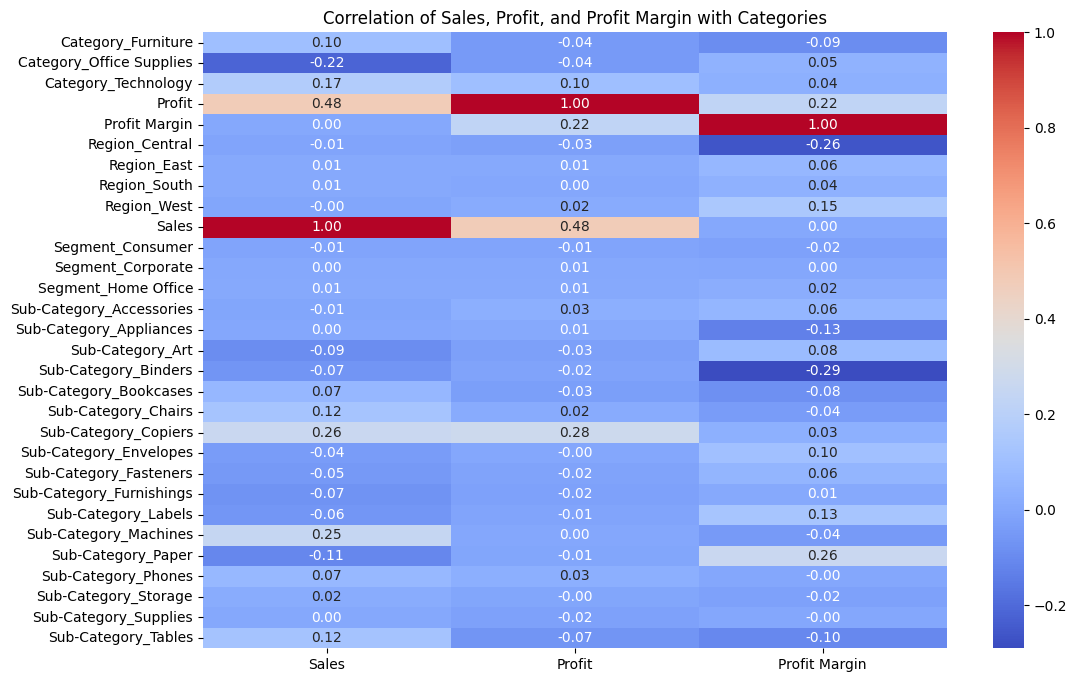

In [29]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Select relevant columns
cols = ['Segment', 'Region', 'Category', 'Sub-Category', 'Sales', 'Profit', 'Profit Margin']
df_corr = df[cols]

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_corr, columns=['Segment', 'Region', 'Category', 'Sub-Category'])

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Show correlation only with Sales, Profit, Profit Margin
corr_subset = corr_matrix[['Sales', 'Profit', 'Profit Margin']].sort_index()


# Visualize with a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation of Sales, Profit, and Profit Margin with Categories')
plt.show()